In [97]:
#import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Insights
--

In [98]:
#load the dataset
df= pd.read_csv('sales_data.csv')
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [99]:
# Date: Date of the record.
# Store ID: Unique identifier for the store.
# Product ID: Unique identifier for the product.
# Category: Product category.
# Region: Geographical region of the store.
# Inventory Level: Units available in stock.
# Units Sold: Units sold on that day.
# Units Ordered: Units ordered for restocking.
# Price: Product price.
# Discount: Discount applied, if any.
# Weather Condition: Weather on the day of the record.
# Promotion: 1 if there was a promotion, 0 otherwise.
# Competitor Pricing: Price of a similar product from a competitor.
# Seasonality: Season (e.g., Winter, Spring).
# Epidemic: 1 if an epidemic occurred, 0 otherwise.
# Demand: Daily estimated demand for the product



In [100]:
print("Dataset Shape:", df.shape)

Dataset Shape: (76000, 16)


In [101]:
print("Data Types:\n", df.dtypes)


Data Types:
 Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Price                 float64
Discount                int64
Weather Condition      object
Promotion               int64
Competitor Pricing    float64
Seasonality            object
Epidemic                int64
Demand                  int64
dtype: object


In [102]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64


In [103]:
# Convert 'Date' column to datetime format and extract month and day
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

/var/folders/j4/87r164g571g19hxdqwwwrgr00000gn/T/ipykernel_68118/2156247622.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Demand', data=monthly_demand, palette='viridis')


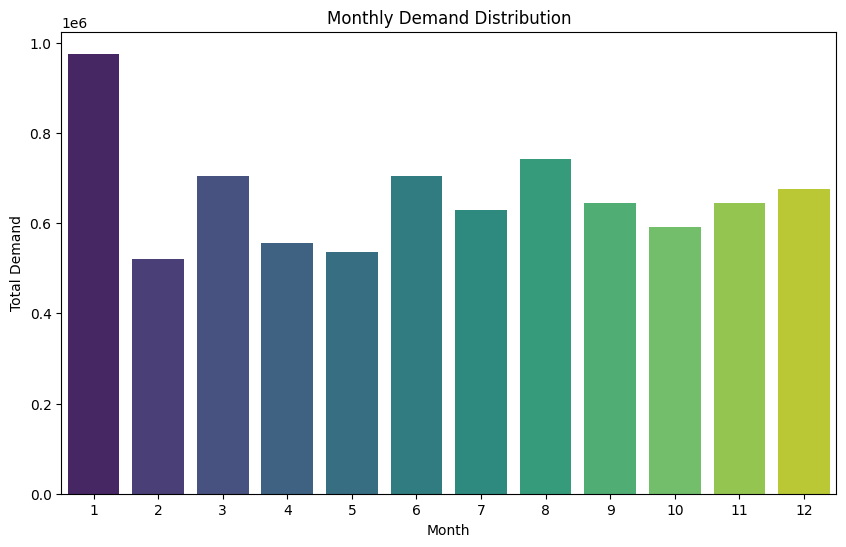

In [104]:
#checking which months have the highest demand
monthly_demand = df.groupby('Month')['Demand'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Demand', data=monthly_demand, palette='viridis')
plt.title('Monthly Demand Distribution')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.show()


/var/folders/j4/87r164g571g19hxdqwwwrgr00000gn/T/ipykernel_68118/1141411063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of Week', y='Demand', data=weekly_demand, palette='viridis')


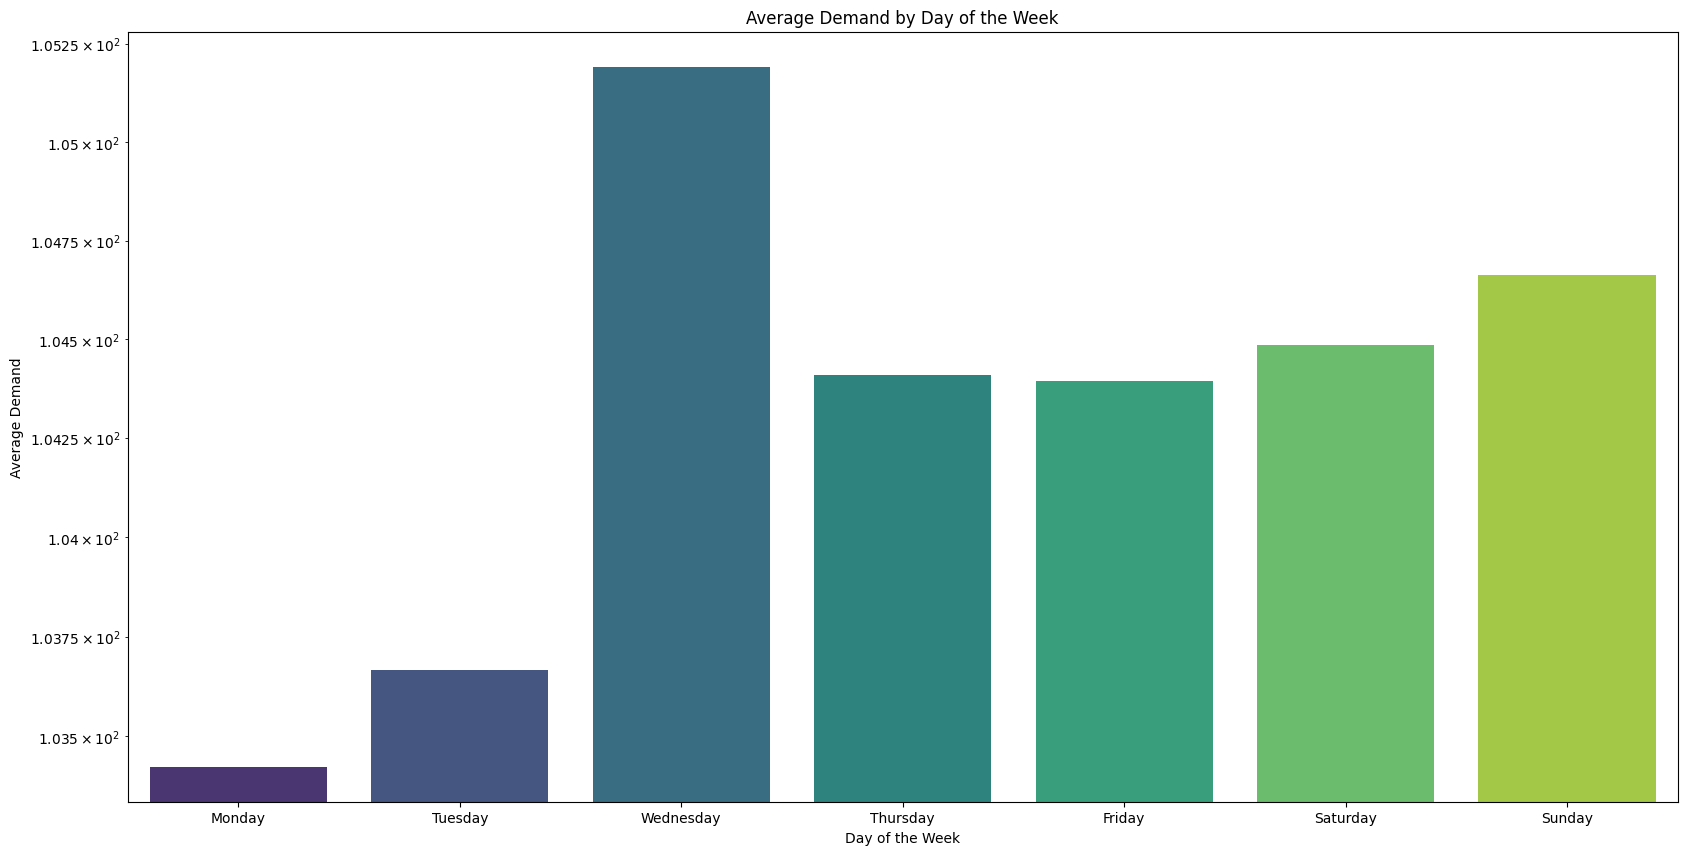

In [105]:
#check which day of the week has the highest demand
df['Day of Week'] = df['Date'].dt.day_name()
weekly_demand = df.groupby('Day of Week')['Demand'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='Day of Week', y='Demand', data=weekly_demand, palette='viridis')
plt.title('Average Demand by Day of the Week')
plt.yscale('log')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.show()



/var/folders/j4/87r164g571g19hxdqwwwrgr00000gn/T/ipykernel_68118/3893184820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store ID', y='Demand', data=store_demand, palette='viridis',)


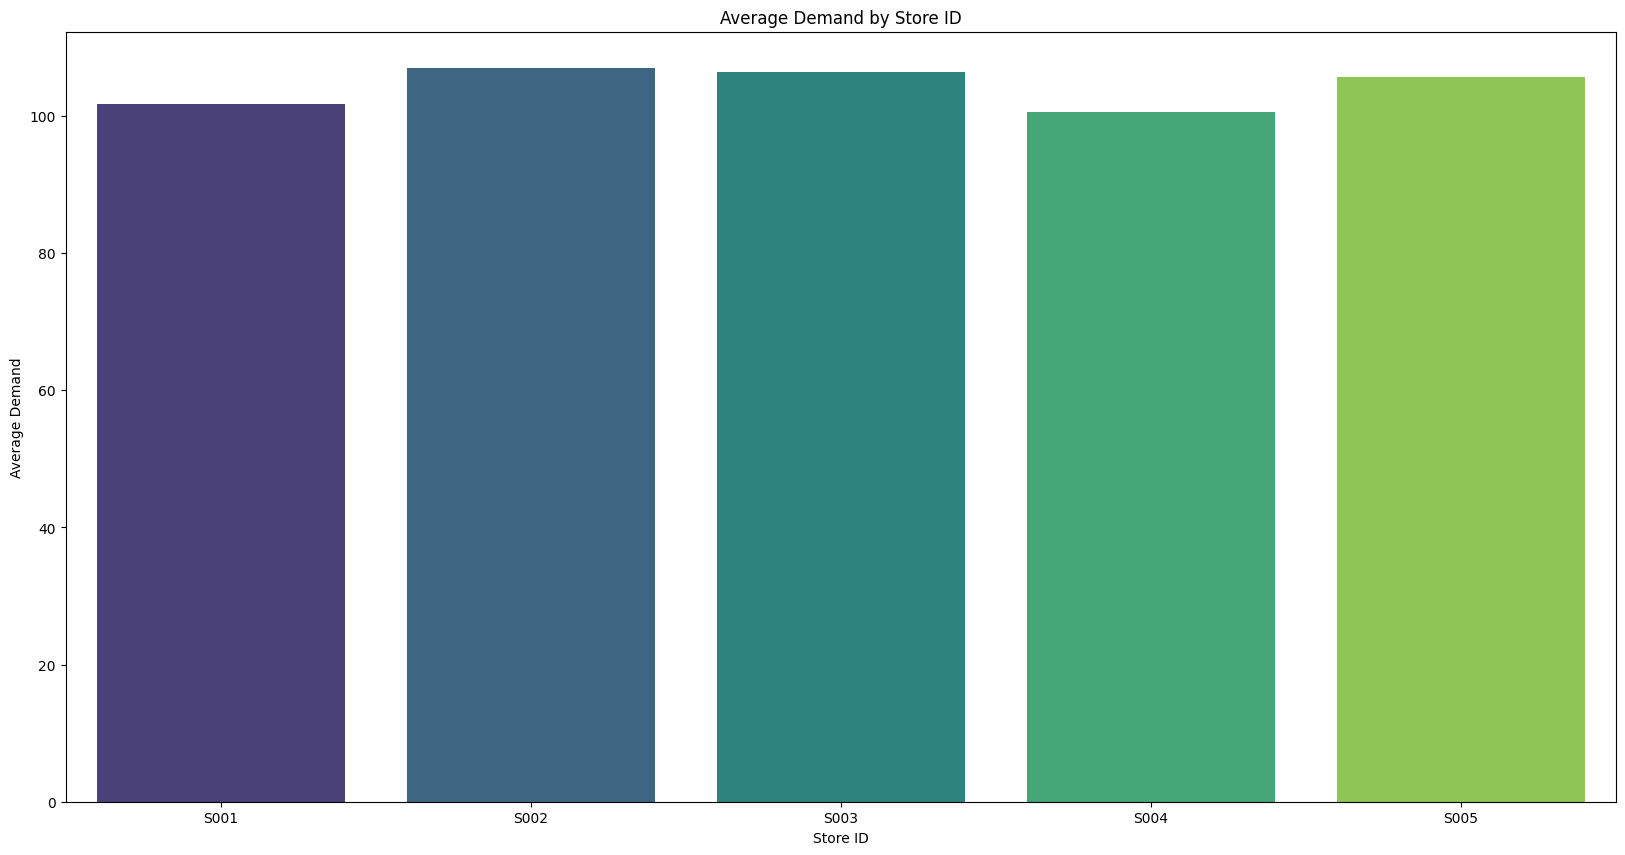

In [106]:
#check the difference in demand in different stores
store_demand = df.groupby('Store ID')['Demand'].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='Store ID', y='Demand', data=store_demand, palette='viridis',)
plt.title('Average Demand by Store ID')
plt.xlabel('Store ID')
plt.ylabel('Average Demand')
plt.show()

/var/folders/j4/87r164g571g19hxdqwwwrgr00000gn/T/ipykernel_68118/4016414495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product ID', y='Demand', data=product_demand, palette='viridis')


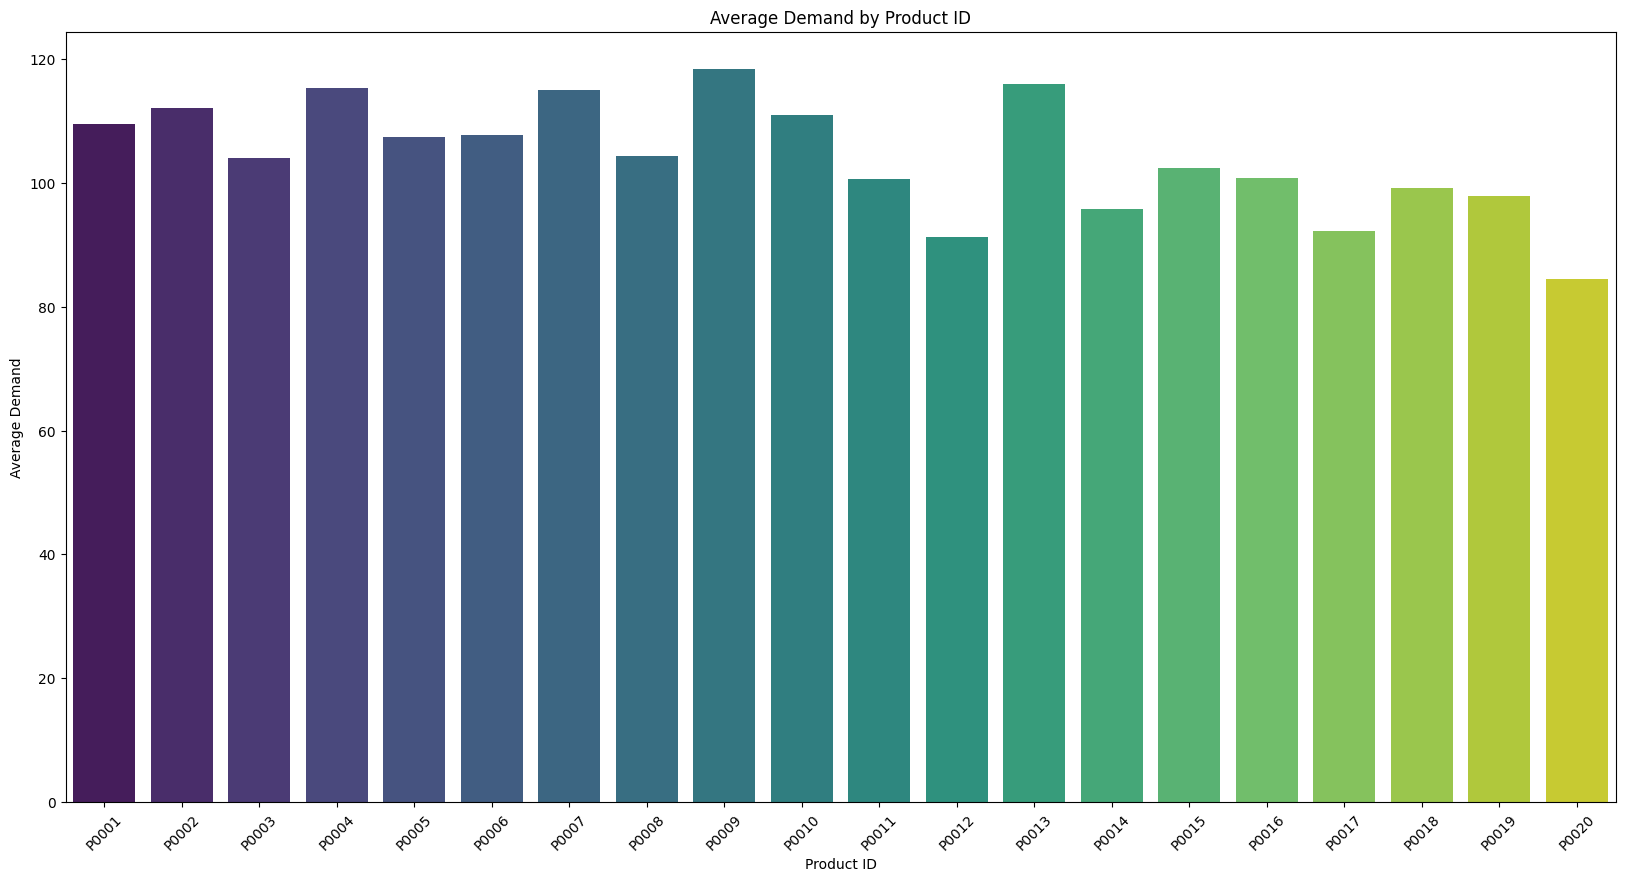

In [107]:
# Which products are most in demand?
product_demand = df.groupby('Product ID')['Demand'].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='Product ID', y='Demand', data=product_demand, palette='viridis')
plt.title('Average Demand by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.show()


/var/folders/j4/87r164g571g19hxdqwwwrgr00000gn/T/ipykernel_68118/3171199785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather Condition', y='Demand', data=weather_demand, palette='viridis')


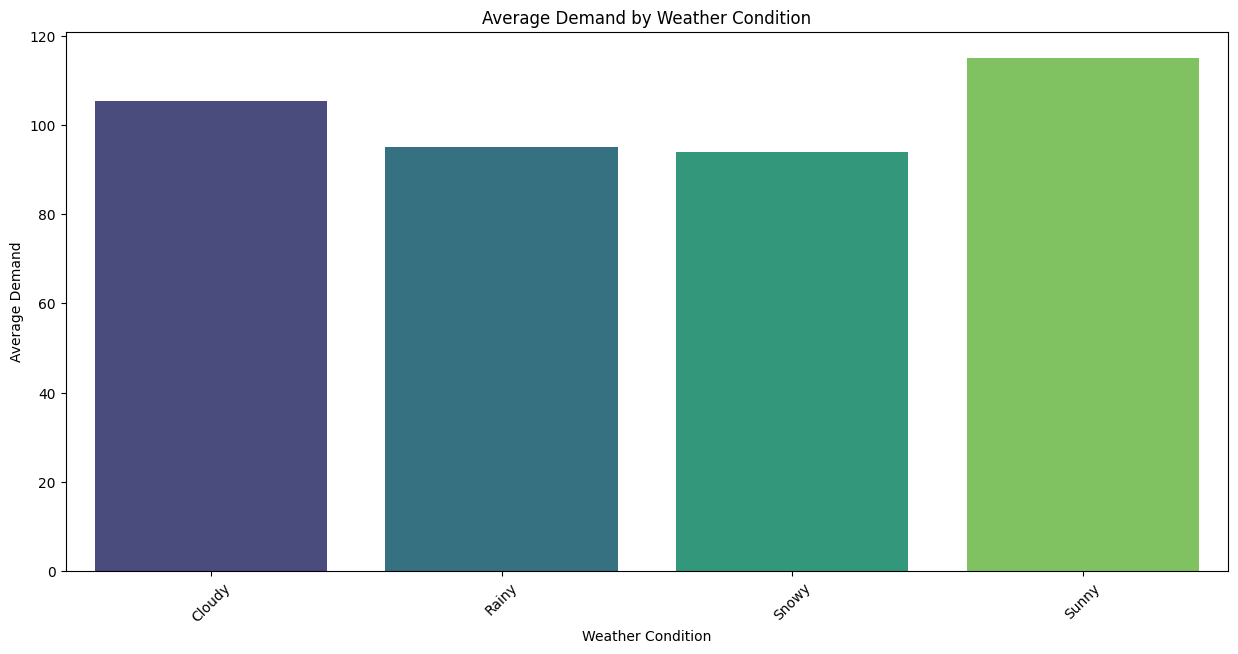

In [108]:
#weather condition impact on demand
weather_demand = df.groupby('Weather Condition')['Demand'].mean().reset_index()
# Plot weather demand
plt.figure(figsize=(15, 7))
sns.barplot(x='Weather Condition', y='Demand', data=weather_demand, palette='viridis')
plt.title('Average Demand by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.show()

Number of outliers in demand: 986


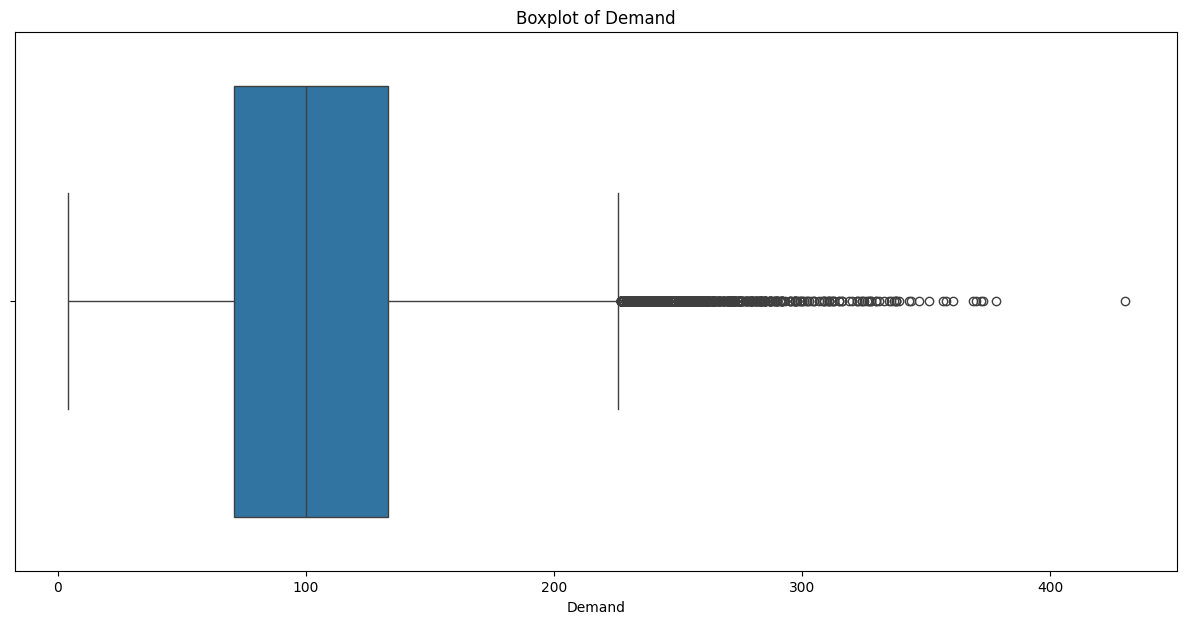

In [109]:
#Outliers in demand
Q1 = df['Demand'].quantile(0.25)
Q3 = df['Demand'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Demand'] < (Q1 - 1.5 * IQR)) | (df['Demand'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in demand:", outliers.shape[0])
# Plot outliers
plt.figure(figsize=(15, 7))
sns.boxplot(x=df['Demand'])
plt.title('Boxplot of Demand')
plt.xlabel('Demand')
plt.show()

Outliers are retained as Random Forest is robust to them and can handle extreme values effectively.


/var/folders/j4/87r164g571g19hxdqwwwrgr00000gn/T/ipykernel_68118/4008597195.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Demand', data=df, ci=None)


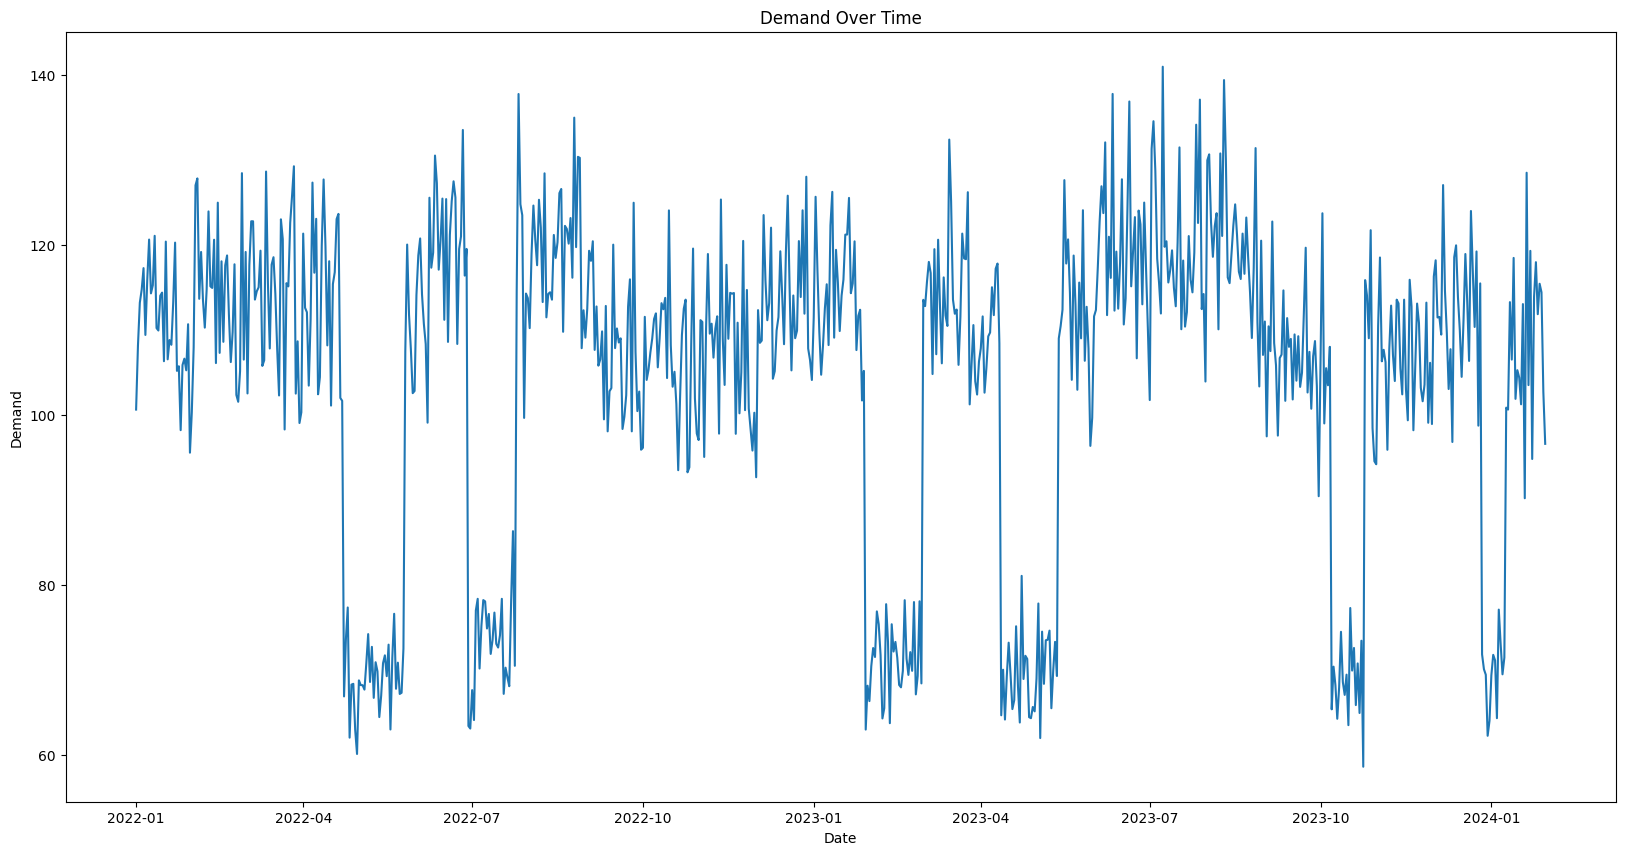

In [110]:
# Check for patterns in demand over time and create a smooth graph
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Demand', data=df, ci=None)
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

Trasformation
--------------------------------------------------------------


In [118]:
df.columns

Index(['Inventory Level', 'Price', 'Discount', 'Promotion',
       'Competitor Pricing', 'Demand', 'Month', 'Day', 'Units Sold Lag1',
       'Units Ordered Lag1', 'Store ID_S002', 'Store ID_S003', 'Store ID_S004',
       'Store ID_S005', 'Product ID_P0002', 'Product ID_P0003',
       'Product ID_P0004', 'Product ID_P0005', 'Product ID_P0006',
       'Product ID_P0007', 'Product ID_P0008', 'Product ID_P0009',
       'Product ID_P0010', 'Product ID_P0011', 'Product ID_P0012',
       'Product ID_P0013', 'Product ID_P0014', 'Product ID_P0015',
       'Product ID_P0016', 'Product ID_P0017', 'Product ID_P0018',
       'Product ID_P0019', 'Product ID_P0020', 'Category_Electronics',
       'Category_Furniture', 'Category_Groceries', 'Category_Toys',
       'Region_North', 'Region_South', 'Region_West',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter'],
      dtype='object')

In [ ]:
# Create lag features for Units Sold and Units Ordered
#lag feature used previous day's values to predict current day's demand
df['Units Sold Lag1'] = df['Units Sold'].shift(1)
df['Units Ordered Lag1'] = df['Units Ordered'].shift(1)

# Drop rows with NaN values caused by shifting
df = df.dropna()

In [ ]:
#drop unnecessary columns 'Date', 'Epidemic'
df.drop(columns=['Date', 'Day of Week', 'Epidemic', 'Units Sold', 'Units Ordered'], inplace=True)


In [ ]:
#one-hot encode these features: 'Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality'
df = pd.get_dummies(df, columns=['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality'], drop_first=True)



In [ ]:
df.columns

Index(['Inventory Level', 'Price', 'Discount', 'Promotion',
       'Competitor Pricing', 'Demand', 'Month', 'Day', 'Units Sold Lag1',
       'Units Ordered Lag1', 'Store ID_S002', 'Store ID_S003', 'Store ID_S004',
       'Store ID_S005', 'Product ID_P0002', 'Product ID_P0003',
       'Product ID_P0004', 'Product ID_P0005', 'Product ID_P0006',
       'Product ID_P0007', 'Product ID_P0008', 'Product ID_P0009',
       'Product ID_P0010', 'Product ID_P0011', 'Product ID_P0012',
       'Product ID_P0013', 'Product ID_P0014', 'Product ID_P0015',
       'Product ID_P0016', 'Product ID_P0017', 'Product ID_P0018',
       'Product ID_P0019', 'Product ID_P0020', 'Category_Electronics',
       'Category_Furniture', 'Category_Groceries', 'Category_Toys',
       'Region_North', 'Region_South', 'Region_West',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter'],
      dtype='object')

Model creation
--

In [86]:
# Define features and target
X = df.drop(columns=['Demand'])
y = df['Demand']
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
#fit a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [126]:
#perform cross-validation using grid search
from sklearn.model_selection import GridSearchCV       
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)   

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=  18.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=  19.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=  19.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  41.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  41.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  41.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=  20.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=  20.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=  19.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=None, min_sam

/Users/asmitkaushal/.venvs/global/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=  18.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=  18.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=  18.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=  36.7s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  11.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=  38.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=  37.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  12.5s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  12.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] EN

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [129]:
import pickle
# Save the rf model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
#save the grid search model to a file
with open('grid_search_model.pkl', 'wb') as file:
    pickle.dump(grid_search, file)    

Models Evaluation
--

In [127]:
#grid search results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_) 

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.8125554065476998


In [121]:
ypred = rf_model.predict(X_test)

In [122]:
#evaluate the model with mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ypred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 304.20003566447366
R-squared: 0.8606873171765537
Root Mean Squared Error: 17.44133124691099
Mean Absolute Error: 10.348775657894738


In [128]:
#calculate the grid search r2, rmse, mae, mse
grid_mse = mean_squared_error(y_test, grid_search.predict(X_test))
grid_r2 = r2_score(y_test, grid_search.predict(X_test))
grid_rmse = np.sqrt(grid_mse)
grid_mae = mean_absolute_error(y_test, grid_search.predict(X_test))
print("Grid Search Mean Squared Error:", grid_mse)
print("Grid Search R-squared:", grid_r2)
print("Grid Search Root Mean Squared Error:", grid_rmse)
print("Grid Search Mean Absolute Error:", grid_mae)

Grid Search Mean Squared Error: 302.1794930213816
Grid Search R-squared: 0.861612653085057
Grid Search Root Mean Squared Error: 17.383310761226745
Grid Search Mean Absolute Error: 10.305295065789473


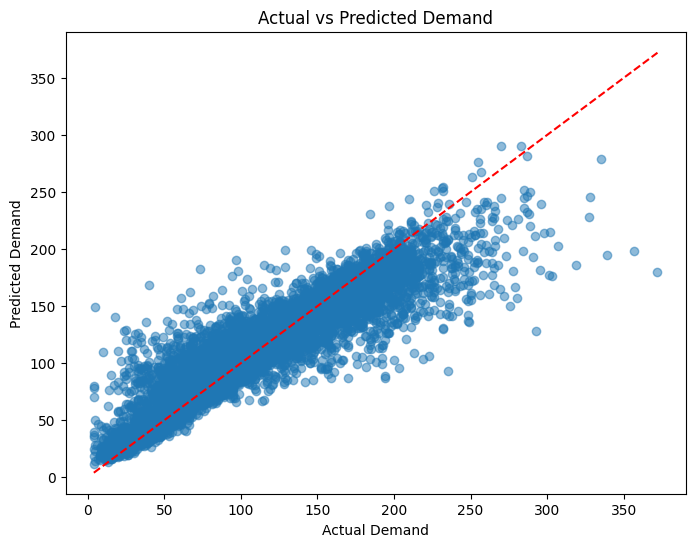

In [ ]:
#Visualize the actual vs predicted demand
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred, alpha=0.5)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


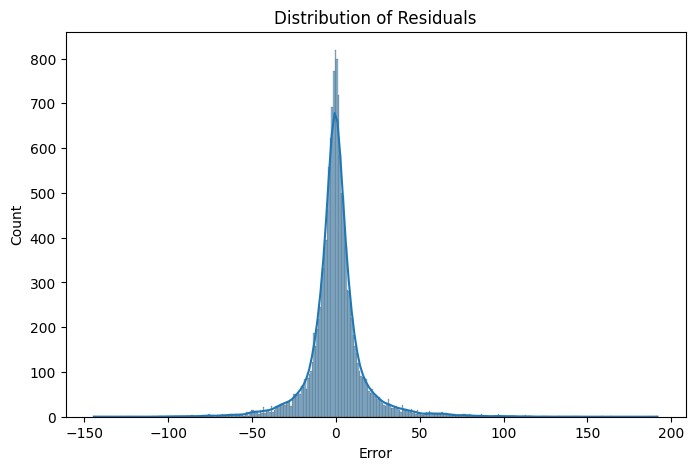

In [ ]:
#Visualize the distribution of residuals
residuals = y_test - ypred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.show()
